## Small angle X-ray scattering

We begin by loading the libraries you will require later on for your calculations.

In [19]:
# import required libraries
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
from scipy.stats import linregress

---
### Exercise 1

You are given three **SAXS datasets**, which are saved in `Iq_1.dat`, `Iq_2.dat` and `Iq_3.dat`, which contain the measured intensity $I(q)$ depending on the magnitude of the scattering vector $q$ in Å$^{-1}$. The scattering curves where taken from [here](https://somo.chem.utk.edu/shape2sas/).

Our objective is to analyze these datasets and determine the **small-angle X-ray scattering (SAXS)** parameters of the samples to give an estimate of the shape and size of the underlying particle structure.

**First**, load and plot the data from the respective files. 

To obtain an **estimation of the shape** of the particles, you will have to fit the SAXS data in the **high-q region**, i.e. **from 0.03 Å$^{-1}$ onwards** performing a linear regression using [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function from the ``scipy.stats`` module. This will give you the **slope** of the linear fit, which you can use to estimate the **overall shape**. 

**Hints:**
- For the **steady SAXS data** you can run the linear regression fit directely from the imported data sets in the relevant ranges given. Please also keep in mind the **logarithmic axis scaling** for your linear regression.
- Note that for the **SAXS data with the jumps** at high q, we want to **fit only the overall shape** of these, and therefore **select the maxima manually** using an interactive ``plotly`` line-graph.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [20]:
# Load the data from CSV files into DataFrames
# Each file contains SAXS data with columns separated by spaces
# We select specific columns and rename them for clarity

# Structure 1
str_1 = pd.read_csv(
    r"data\Iq_1.dat", sep=" ", header=0, usecols=[2, 9], names=["q", "I"]
)

# Structure 2
str_2 = pd.read_csv(
    r"data\Iq_2.dat", sep=" ", header=0, usecols=[2, 9], names=["q", "I"]
)

# Structure 3
str_3 = pd.read_csv(
    r"data\Iq_3.dat", sep=" ", header=0, usecols=[2, 9], names=["q", "I"]
)

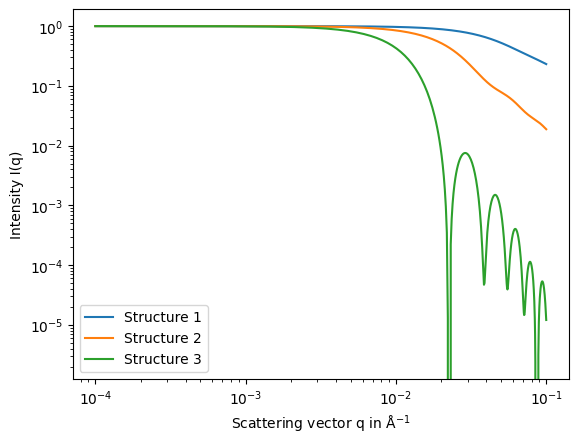

In [21]:
# Plot the SAXS datasets
plt.plot(str_1["q"], str_1["I"], label="Structure 1")
plt.plot(str_2["q"], str_2["I"], label="Structure 2")
plt.plot(str_3["q"], str_3["I"], label="Structure 3")

# Label the x-axis and y-axis
plt.xlabel("Scattering vector q in Å$^{-1}$")
plt.ylabel("Intensity I(q)")

# Set the y-axis and x-axis to log scale
plt.yscale("log")
plt.xscale("log")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


In [22]:
# Define the high q threshold for steady SAXS data in high q region
highq_thresh = 0.03

# Perform linear regression for structure 1
slope1, intercept1, r, p, se = linregress(
    np.log(str_1["q"][str_1["q"] > highq_thresh]),
    np.log(str_1["I"][str_1["q"] > highq_thresh]),
)

# Perform linear regression for structure 2
slope2, intercept2, r, p, se = linregress(
    np.log(str_2["q"][str_2["q"] > highq_thresh]),
    np.log(str_2["I"][str_2["q"] > highq_thresh]),
)

In [23]:
# Create a line plot for the SAXS data with jumps in high q region
fig = px.line(
    x=str_3["q"],
    y=str_3["I"],
    title="Measured SAXS signal with jumps in high q region (azimutally integrated)",
    log_x=True,
    log_y=True,
)

# Update the layout to set axis titles
fig.update_layout(
    xaxis_title="Scattering vector q in Å⁻¹", yaxis_title="Intensity I(q)"
)

# Display the plot
fig.show()


In [30]:
# Define q values for the SAXS data with jumps in high q region
q_data = np.array([0.02883, 0.04620, 0.06224, 0.0779, 0.09432])

# Initialize y_data array with the same size as q_data
y_data = np.empty_like(q_data)

# Fill y_data with corresponding I values from SAXS data for each q value in q_data
for i, q in enumerate(q_data):
    # Find the index of the nearest q value in SAXS data
    ind = np.argmin(np.abs(str_3["q"] - q))
    # Assign the corresponding I value to y_data
    y_data[i] = str_3["I"].iloc[ind]

# Perform linear regression for the SAXS data with jumps in high q region
slope3, intercept3, r, p, se = linregress(np.log(q_data), np.log(y_data))


In [31]:
# print the results from all three structures
print(f"Slope α in high q of structure 1 is {-slope1:.4f} Å⁻¹.")
print(f"Slope α in high q of structure 2 is {-slope2:.4f} Å⁻¹.")
print(f"Slope α in high q of structure 3 is {-slope3:.4f} Å⁻¹.")

Slope α in high q of structure 1 is 1.0668 Å⁻¹.
Slope α in high q of structure 2 is 2.0439 Å⁻¹.
Slope α in high q of structure 3 is 4.2465 Å⁻¹.


We may **plot the fits** to our three structures to gain a visual assessment.

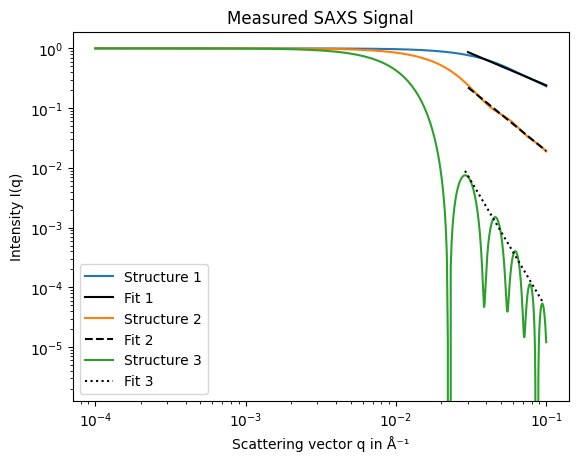

In [32]:
# Plot the measured SAXS signal for structure 1
plt.plot(str_1["q"], str_1["I"], label="Structure 1")

# Plot the fit for structure 1 data for q values greater than highq_thresh
q_str1_high = str_1["q"][str_1["q"] > highq_thresh]
fit_str1 = np.exp(np.log(q_str1_high) * slope1 + intercept1)
plt.plot(q_str1_high, fit_str1, "black", label="Fit 1")

# Plot the measured SAXS signal for structure 2
plt.plot(str_2["q"], str_2["I"], label="Structure 2")

# Plot the fit for structure 2 data for q values greater than highq_thresh
q_str2_high = str_2["q"][str_2["q"] > highq_thresh]
fit_str2 = np.exp(np.log(q_str2_high) * slope2 + intercept2)
plt.plot(q_str2_high, fit_str2, "black", linestyle="dashed", label="Fit 2")

# Plot the measured SAXS signal for structure 3
plt.plot(str_3["q"], str_3["I"], label="Structure 3")

# Plot the fit for structure 3 data using q_data
fit_str3 = np.exp(np.log(q_data) * slope3 + intercept3)
plt.plot(q_data, fit_str3, "black", linestyle="dotted", label="Fit 3")


# Set the settings of the plot
plt.title("Measured SAXS Signal")
plt.xlabel("Scattering vector q in Å⁻¹")
plt.ylabel("Intensity I(q)")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()


Based on **the slope** calculated in the previous cells, **estimate the shapes** that correspond to each SAXS data

**Hint:**
- Use you lecture notes.

**Shape estimations:**
- `Iq_1.dat`: rod
- `Iq_2.dat`: disk / cylinder
- `Iq_3.dat`: sphere

---
### Exercise 2

**Now**, delineate the **[Guinier region](https://gisaxs.com/index.php/Guinier_plot)** within the plot from `Exercise 1` and compute the **radii of gyration** $R_g$ of the samples. State clearly which data points you use to do so. Based on this information, can you **determine their size** more precisely? Please justify all assumptions you are making during your calculations and conclusion.

**Hints:**
- To fit the radius of gyration you must select only that area, where the SAXS curves appear constant.
- To visualize **Guinier region** more clearly begin by plotting $q^2$ vs. $log(I)$.

---

**Assumptions of fitting the radius of gyration:**  

$q<0.005$ Å$^{-1}$ for structures 1 and 2, but  
$q<0.001$ Å$^{-1}$ for structure 3.

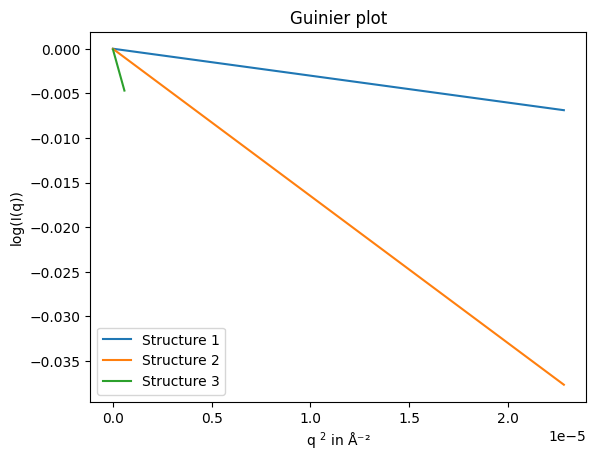

In [33]:
# Define the Guinier threshold for structure 1 and 2
guinier_thresh = 0.005
plt.plot(
    str_1[(str_1["q"] < guinier_thresh)]["q"] ** 2,
    np.log(str_1[(str_1["q"] < guinier_thresh)]["I"]),
    label="Structure 1",
)
plt.plot(
    str_1[(str_2["q"] < guinier_thresh)]["q"] ** 2,
    np.log(str_2[(str_2["q"] < guinier_thresh)]["I"]),
    label="Structure 2",
)

# Define a different Guinier threshold for structure 3
guinier_thresh = 0.001
plt.plot(
    str_1[(str_3["q"] < guinier_thresh)]["q"] ** 2,
    np.log(str_3[(str_3["q"] < guinier_thresh)]["I"]),
    label="Structure 3",
)

# Set the title of the plot
plt.title("Guinier plot")

# Label the x-axis and y-axis
plt.xlabel("q $^2$ in Å⁻²")
plt.ylabel("log(I(q))")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


We will now **fit the linear function** within the **Guinier region** for the three samples with the functions we have defined by using the `scipy` function `linregress`.

In [34]:
# Function to calculate the radius of gyration of a structure
def calculate_radius_of_gyration(data, guinier_thresh, structure_name):
    # Perform linear regression for the given data and threshold
    slope, intercept, r, p, se = linregress(
        (data["q"][(data["q"] < guinier_thresh)]) ** 2,
        np.log(data["I"][(data["q"] < guinier_thresh)]),
    )

    # Calculate the radius of gyration
    R_G = np.sqrt(-3 * slope)

    # Print the radius of gyration with the structure name
    print(f"Radius of gyration of {structure_name} is {np.round(R_G, 2)} Å.")

    return R_G


# Define the Guinier threshold for  and disc data
guinier_thresh = 0.005

# Calculate radius of gyration for each structure
R_G_1 = calculate_radius_of_gyration(str_1, guinier_thresh, "Structure 1")
R_G_2 = calculate_radius_of_gyration(str_2, guinier_thresh, "Structure 2")

# Define a different Guinier threshold for sphere data
guinier_thresh = 0.001

# Calculate radius of gyration for sphere data
R_G_3 = calculate_radius_of_gyration(str_3, guinier_thresh, "Structure 3")

Radius of gyration of Structure 1 is 30.1 Å.
Radius of gyration of Structure 2 is 70.36 Å.
Radius of gyration of Structure 3 is 154.48 Å.


The results indicate that structure 1 is a rod, structure 2 a disc or cylinder and structure 3 a sphere. Based on this information and the radius of gyration, we can determine the radius of the sphere, because $$R=\sqrt{\frac{5}{3}R_g^2}$$
Similary, we may assume for the rod that it is a cylinder with $R_1=R_2$ and we can therefore determine its height as $$h=\sqrt{12R_g^2}$$ 

In [35]:
# calculate the radius of the sphere and the height/length of the rod
R_comp = np.sqrt(R_G_3**2 * 5 / 3)
print("Radius of sphere is", np.round(R_comp / 10, 2), "nm.")
h_comp = np.sqrt(R_G_1**2 * 12)
print("Height/length of rod is", np.round(h_comp / 10, 2), "nm.")

Radius of sphere is 19.94 nm.
Height/length of rod is 10.43 nm.


<details>
<summary>Click this to collapse/fold the solution.</summary>



<div class="alert alert-block alert-warning">
<b>Solution:</b> In fact, the structures for which the SAXS spectra were generated were a cylinder with equal radii of 10 Å and a height of 10 nm, which equates to a rod, as well as a flat disk of height 10 nm and radius of 10 Å, and lastly a sphere of 20 nm radius.
</div>

</details>

---